In [96]:
import scipy.special as sc
import matplotlib.pyplot as plt

## ECCSAMPLES

In [93]:
# import mpmath as mp
# import numpy as np
# import math
# import scipy.special

# # === AUTHOR ===
# # David M. Kipping, Columbia University
# # d.kipping@columbia.edu

# # === DESCRIPTION ===
# # ECCSAMPLES transforms a sample drawn from a bivariate uniform distribution
# # into a sample drawn from P(e,w|transit), where P(e,w|transit) is the a-priori
# # joint probability distribution a planet's orbital eccentricity, e, and
# # argument of periastron, w, given that the planet is known to transit its
# # host star. A fundamental assumption of this code is that the intinsic
# # prior distribution of eccentricity, P(e), is described by a Beta distribution
# # with shape parameters a & b. One may also draw directly from the intrinsic
# # priors instead, by setting the logical "transit" to 0.

# # === INPUTS ===
# # transit = Logical, where 1 => planet is known to transit its host star;
# #           0 => it is unknown whether the planets transits.
# # a = First shape parameter of the Beta distribution describing P(e).
# #     Must be real and satisfy a>0.
# # b = Second shape parameter of the Beta distribution describing P(e).
# #     Must be real and satisfy b>1.
# # xe = Proxy parameter for eccentricity, e. Must be real and satisfy 0<xe<1.
# #      xe is assumed to be uniformly distributed.
# # xw = Proxy parameter for argument of periastron, w. Must be real and satisfy
# #      0<xw<1. xw is assumed to be uniformly distributed.
# # verbose = Logical determining whether to provide verbose output (1=yes, 0=no)

# # === OUTPUTS ===
# # Returns [efinal,wfinal] list, where...
# # efinal = Transformed value of xe, an eccentricity variate drawn from the
# #          target distribution. Real and falls in the range 0<efinal<1.
# # wfinal = Transformed value of xw, an argument of periastron variate drawn
# #          from the target distribution. Real and falls in the range
# #          0<wfinal<2pi.
# #
# # === REFERENCE ===
# # Use of this code should cite:
# # Kipping, D. M., 2014, MNRAS, 444, 2263-2269
# # Kipping, D. M., 2013, MNRAS, 434, L51-55
# #
# # === DEPENDENCIES ===
# # There several dependecies needed to correctly compile ECCSAMPLES:
# # * numpy
# #   [at http://www.numpy.org]
# # * scipy.special
# #   [at http://scipy.org]
# # * mpmath
# #   [http://mpmath.org]
# #
# # === COMPUTATION TIME ===
# # Computation time is ~50ms per sample using an Intel Core i7-3720QM
# # processor with hyperthreading activated. Note that the Fortran version
# # is ~100 faster.

# # ==============================================================================
# def ecc_sample(transit,verbose,alpha,beta,xe,xw):
#   # Useful constains
#   etol = 1.0e-3 		          # Tolerance in precision of e
#   wtol = 6.283185307179586e-3 # Tolerance in precision of w
#   twopi = 2.0*(np.pi)
#   # Initialize with assumption of no errors
#   process = 1
#   # Check uniform variates are valid
#   if xe>1 or xe<0 or xw>1 or xw<0:
#     if verbose == 1:
#       print('ERROR: xe and xw must be in the interval [0,1]')
#     process = 0
#   # Check shape parameters are valid
#   if alpha<=0 or beta<=1:
#     if verbose == 1:
#       print('ERROR: ECCSAMPLES requires a>0 and b>1')
#     process = 0
#   # Now proceed, provided process == 1
#   if process == 1:
#     # State uniform random variates, if verbose
#     if verbose == 1:
#       print('xe = ',xe)
#       print('xw = ',xw)
#     # Check whether object is known to be transiting
#     if transit == 1: # Draw samples from P(e,w|transit)
#       if verbose == 1:
#         print('Planet is assumed to be transiting')
#       etrial = xe*0.5   # Start Newton's method from e_1 = xe/2
#       eprec = 1.0       # Precision of first trial set to unity
#       i = 1
#       if verbose == 1:
#         print('i delta(e_i) e_i')
#         print(1,eprec,etrial)
#       # Perform Newton's method on e
#       while eprec > etol:
#         i = i + 1
#         REval = e_ratio(alpha,beta,etrial,xe)
#         eprec = abs(REval)
#         etrial = etrial - REval
#         if verbose == 1:
#           print(i,eprec,etrial)
#       # Define final e value
#       efinal = etrial
#       if verbose == 1:
#         print('e(final) = ',efinal)
#       # Define an initial starting point for the w iteration
#       wtrial = xw*twopi
#       wprec = 1.0
#       i = 1
#       if verbose == 1:
#         print('i delta(w_i) w_i')
#         print(1,wprec,wtrial)
#       # Perform Newton's method on w
#       while wprec > wtol:
#         i = i + 1
#         RWval = w_ratio(efinal,wtrial,xw)
#         wprec = abs(RWval)
#         wtrial = wtrial - RWval
#         if verbose == 1:
#           print(i,wprec,wtrial)
#         wfinal = wtrial
#       if verbose == 1:
#         print('w(final) = ',wfinal)
#     else: # Draw samples from P(e,w)
#       if verbose == 1:
#         print('It is assumed that it is unknown whether the planet transits')
#       # e drawn from Beta distribution
#       efinal = beta_sample(alpha,beta,xe)
#       if verbose == 1:
#         print('e(final) = ',efinal)
#       # w is drawn from uniform distribution
#       wfinal = xw*twopi
#       if verbose == 1:
#         print('w(final) = ',wfinal)
#   else: # process = 0
#     # Invalid inputs, forcing improper outputs
#     efinal = -1.0
#     wfinal = -1.0
#   # Return result
#   ewfinal=[]
#   ewfinal.append(efinal)
#   ewfinal.append(wfinal)
#   return ewfinal
# # ==============================================================================

# # ==============================================================================
# def e_ratio(a,b,e,x):
#   # Get S
#   bt2 = mp.beta(a,b-1.0)             # Beta function
#   bix = mp.betainc(a,b+1.0,0.0,e)    # Incomplete Beta function
#   hf = mp.hyp2f1(1.0,a,a+b-1.0,-1.0) # 2F1, Gauss' hypergeometric function
#   hfre = mp.re(hf)
#   Sval = bix - x*bt2*hfre
#   # Get U
#   c1 = mp.mpc(1.0 + a)
#   c2 = mp.mpc(-b)
#   c3 = mp.mpc(1.0)
#   c4 = mp.mpc(2.0 + a)
#   Uval = mp.appellf1(c1,c2,c3,c4,e,-e)
#   Ure = mp.re(Uval)
#   # Get P & Q
#   Pval = mp.hyp2f1(a+1.0,1.0-b,a+2.0,e) # 2F1, Gauss' hypergeometric function
#   Pre = mp.re(Pval)
#   Qval = mp.hyp2f1(a+1.0,2.0-b,a+2.0,e) # 2F1, Gauss' hypergeometric function
#   Qre = mp.re(Qval)
#   # Get T
#   Tval = ( (e**(1.0+a)) / (1.0+a) )*( 3.0*Pre + 2.0*Qre - Ure )
#   Tval = Tval + 4.0*Sval
#   # Get Rval (ratio)
#   Rval = 0.25*(1.0-e*e)*( (1.0-e)**(1.0-b) )*( e**(1.0-a) )*Tval
#   return Rval
# # ==============================================================================

# # ==============================================================================
# def w_ratio(e,w,x):
#   # Get Rval (ratio)
#   Rval = w - 2.0*(np.pi)*x + e*(1.0-math.cos(w))
#   Rval = Rval/( 1.0 + e*(math.sin(w)) )
#   return Rval
# # ==============================================================================

# # ==============================================================================
# def beta_sample(alpha,beta,x):
#   y=scipy.special.betaincinv(alpha, beta, x)
#   return y
# # ==============================================================================



In [5]:
# import random

# # Number of samples to draw
# n = int(1e2)
# transit = 1
# verbose = 0

# # Define alpha and beta
# alpha = 0.867
# beta = 3.030

# # Generate samples
# samples=[[0 for j in range(2)] for i in range(n)]
# for i in range(n):
#   xe = random.uniform(0, 1)
#   xw = random.uniform(0, 1)
#   ew = ecc_sample(transit,verbose,alpha,beta,xe,xw)
#   samples[i][0] = ew[0]
#   samples[i][1] = ew[1]
  
# # Export samples
# with open("ECCSAMPLES.dat", 'w') as f:
#     f.writelines(' '.join(str(j) for j in i) + '\n' for i in samples)

In [11]:
eccs = np.genfromtxt("ECCSAMPLES.dat")

In [12]:
eccs[:,1] = eccs[:,1]*(180/np.pi)

## Functions included in photoeccentric

In [97]:
def ebprior(alpha, beta, e):
    gamma1 = sc.hyp2f1(1, alpha, alpha+beta-1, -1)
    t1 = ((beta-1)/(gamma1*sc.gamma(alpha+beta)))
    t2 = 1/(1-e**2)
    t3 = ((1-e)**(beta-1)*e**(alpha-1))/sc.beta(alpha, beta)
    
    return t1*t2*t3

def wbprior(alpha, beta, w):
    gamma1 = sc.hyp2f1(1, alpha, alpha+beta-1, -1)
    gamma2 = sc.hyp2f1(1, alpha+1, alpha+beta, -1)
    t1 = (gamma2*alpha*np.sin(w*(np.pi/180)))/gamma1
    return (1/(2*np.pi))*(1+t1)

def ewbprior(alpha, beta, e, w):
    gamma1 = sc.hyp2f1(1, alpha, alpha+beta-1, -1)
    t1 = ((beta-1)/(2*np.pi*gamma1*sc.gamma(alpha+beta)))
    t2 = (1+(e*np.sin(w*(np.pi/180))))/(1-e**2)
    t3 = ((1-e)**(beta-1)*e**(alpha-1))/sc.beta(alpha, beta)

    return t1*t2*t3

In [100]:
e = np.random.uniform(0.001,0.999,10000)
w = np.random.uniform(-90,270,10000)

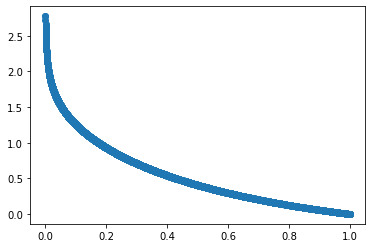

In [101]:
plt.scatter(e, ebprior(0.867, 3.03, e))

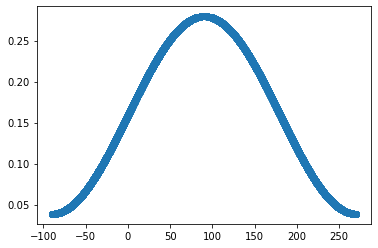

In [102]:
plt.scatter(w, wbprior(0.867, 3.03, w))

In [104]:
prior_vals = []

for i in range(len(e)):

    prior_vals.append(ewbprior(0.867, 3.03, e[i], w[i]))

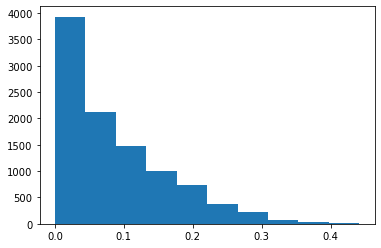

In [105]:
plt.hist(prior_vals);

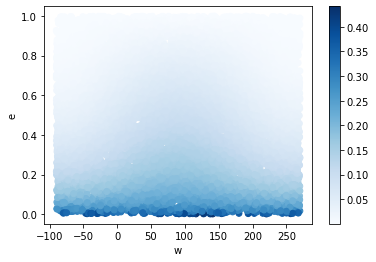

In [108]:
plt.scatter(w,e,c=prior_vals, cmap='Blues');
plt.xlabel('w')
plt.ylabel('e')
plt.colorbar()

In [91]:
def bprior_log_likelihood(theta, g, gerr):
    """Log of likelihood
    model = g(e,w)
    gerr = sigma of g distribution
    """
    w, e = theta
    model = (1+e*np.sin(w*(np.pi/180.)))/np.sqrt(1-e**2)
    sigma2 = gerr ** 2
    return -0.5 * np.sum((g - model) ** 2 / sigma2 + np.log(sigma2))

def bprior_log_prior(theta):
    """Log of prior
    e between 0 and 1
    w between -90 and 300
    """
    w, e = theta
    if 0.0 < e < 1.0 and -90.0 < w < 300.0:
        return ewbprior(0.867, 3.03, e, w)
    return -np.inf

def bprior_log_probability(theta, g, gerr):
    """Log of probability
    """
    lp = bprior_log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, g, gerr)
